In [1]:
%matplotlib inline

c:\users\ismagil\appdata\local\programs\python\python35\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

Primero definimos una función para calcular el campo eléctrico

In [3]:
def E(xp, yp, xf=0, yf=0, q=1):
    """Campo Eléctrico en 2 Dimensiones 
    en un punto de prueba xp, yp
    de una carga fuente en un punto xf, yf
    de valor q
    """    
    
    Dx = xp - xf
    Dy = yp - yf
    
    den = (Dx**2 + Dy**2)**1.5
    
    # Noten que la respuesta e sun vector (Ex, Ey)
    return q * Dx / den, q * Dy / den

Algunos graficos a lo largo de los ejes cartesianos de una carga en el origen

In [4]:
# Primero definimos un rango para graficar, de 1 a 10 con 100 pasos
rango = np.linspace(1, 10, 100)

# Campo a lo largo del Eje X 
Ex, Ey = E(rango, 0)

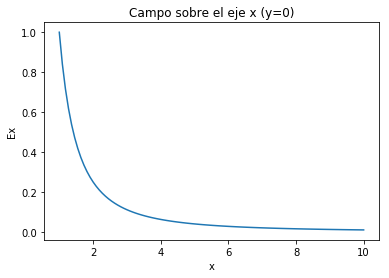

In [5]:
plt.plot(rango, Ex);
plt.xlabel('x');
plt.ylabel('Ex');
plt.title('Campo sobre el eje x (y=0)');

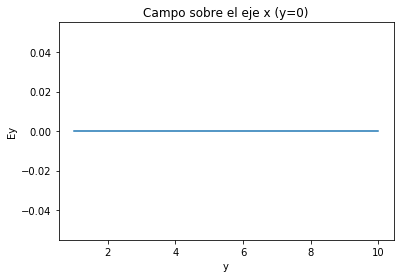

In [6]:
plt.plot(rango, Ey);
plt.xlabel('y');
plt.ylabel('Ey');
plt.title('Campo sobre el eje x (y=0)');

In [7]:
# Ahora lo mismo sobre el eje y 
Ex, Ey = E(0, rango)

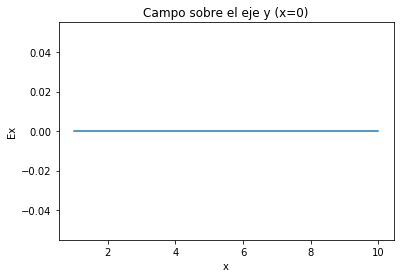

In [8]:
plt.plot(rango, Ex);
plt.xlabel('x');
plt.ylabel('Ex');
plt.title('Campo sobre el eje y (x=0)');

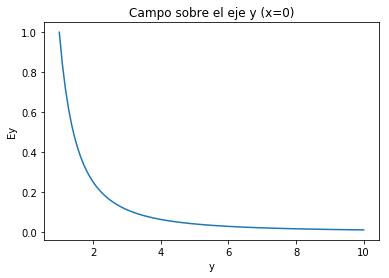

In [9]:
plt.plot(rango, Ey);
plt.xlabel('y');
plt.ylabel('Ey');
plt.title('Campo sobre el eje y (x=0)');

In [10]:
# Ahora en la dirección radial, x=y
Ex, Ey = E(rango, rango)

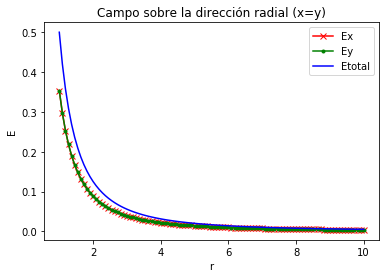

In [11]:
# y graficamos todo junto
r = (rango**2+rango**2)**0.5
plt.plot(rango, Ex, 'rx-', rango, Ey, 'g.-', rango, (Ex**2+Ey**2)**0.5, 'b');
plt.xlabel('r');
plt.ylabel('E');
plt.title('Campo sobre la dirección radial (x=y)');
plt.legend(['Ex', 'Ey', 'Etotal']);

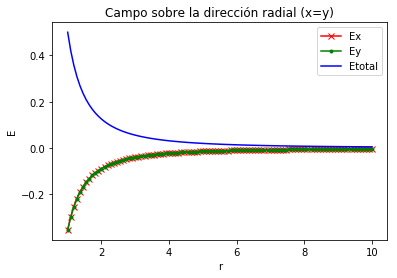

In [12]:
# Ahora con carga negativa. 
# Noten que el campo total esta en modulo

Ex, Ey = E(rango, rango, q=-1)
r = (rango**2+rango**2)**0.5
plt.plot(rango, Ex, 'rx-', rango, Ey, 'g.-', rango, (Ex**2+Ey**2)**0.5, 'b');
plt.xlabel('r');
plt.ylabel('E');
plt.title('Campo sobre la dirección radial (x=y)');
plt.legend(['Ex', 'Ey', 'Etotal']);

In [13]:
# Generamos una grilla donde vamos a calcular el campo eléctrico
nx, ny = 64, 64
rangoX = np.linspace(-2, 2, nx)*1
rangoY = np.linspace(-2, 2, ny)*1
grillaX, grillaY = np.meshgrid(rangoX, rangoY)

# Y calculamos los campos
Ex, Ey = E(grillaX, grillaY)

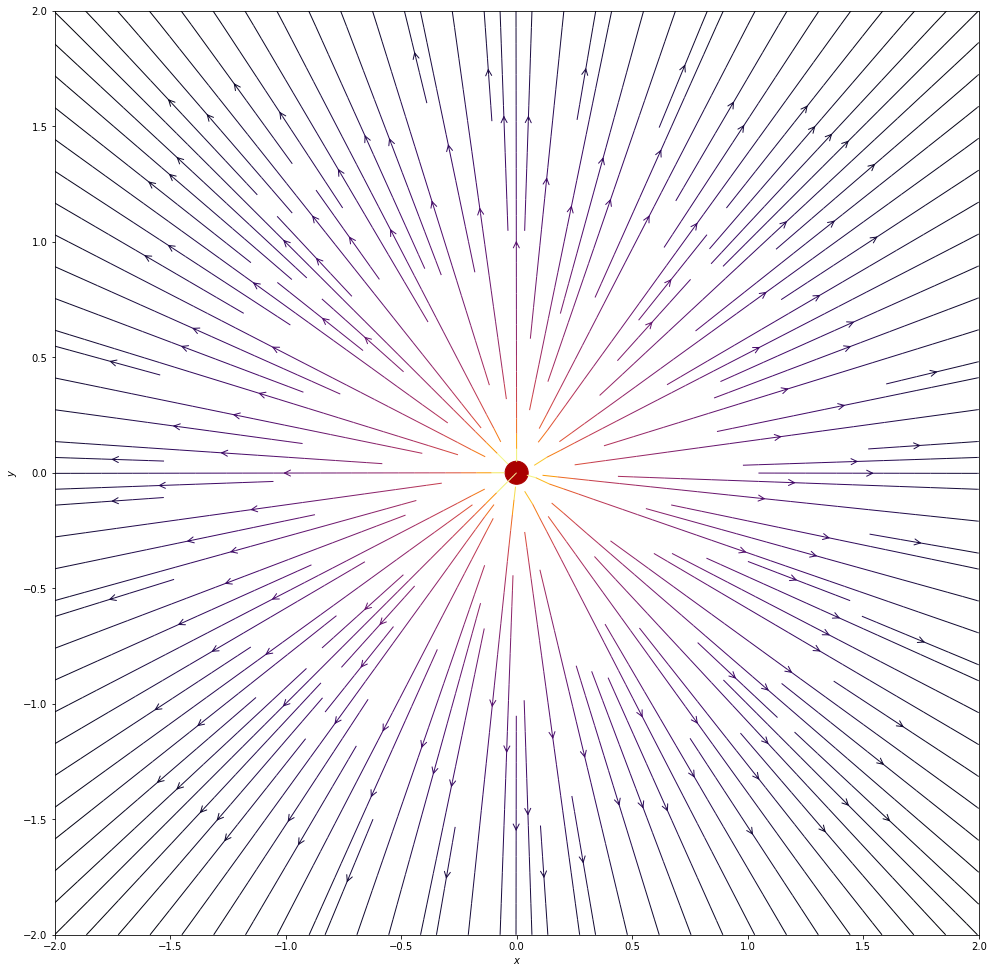

In [14]:
fig = plt.figure(figsize=(17,17))
ax = fig.add_subplot(111)


color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(grillaX, grillaY, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

ax.add_artist(Circle([0,0], 0.05, color='#aa0000'))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()

In [15]:
# Ahora para una carga negativa
Ex, Ey = E(grillaX, grillaY, q=-1)

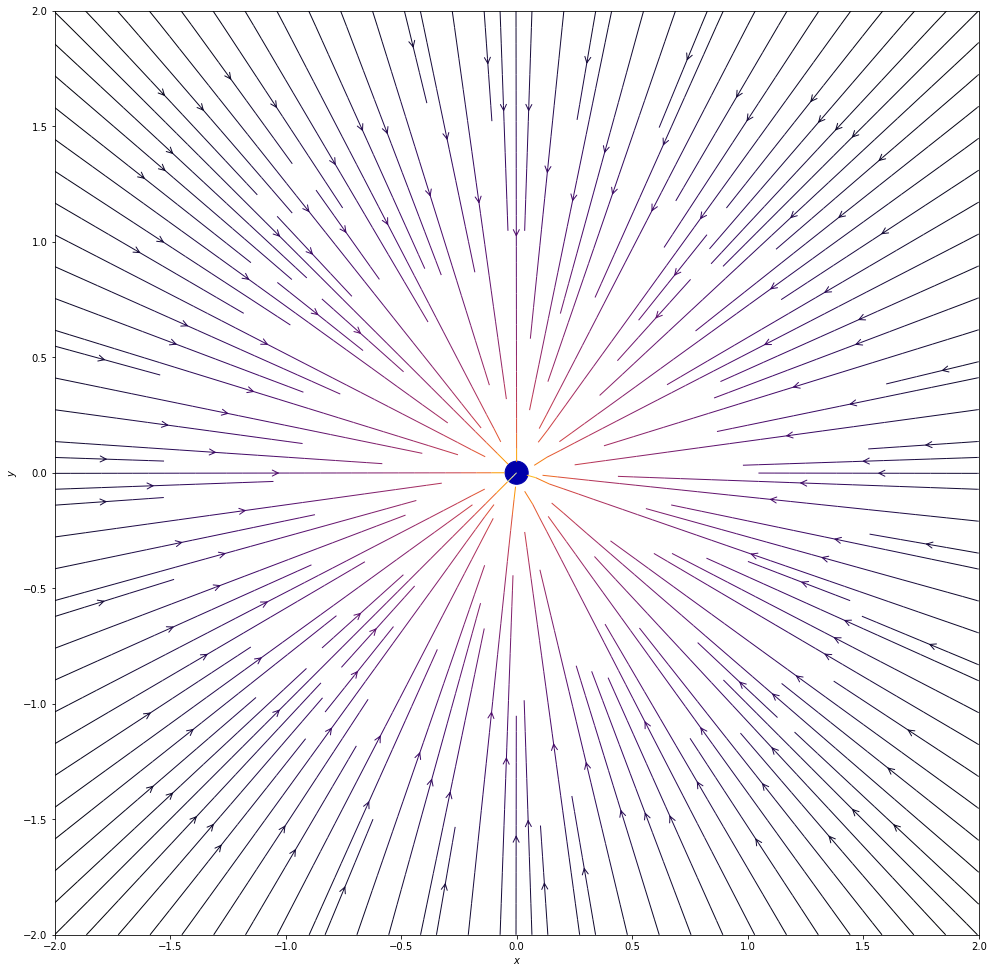

In [16]:
fig = plt.figure(figsize=(17,17))
ax = fig.add_subplot(111)


color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(grillaX, grillaY, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

ax.add_artist(Circle([0,0], 0.05, color='#0000aa'))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()